In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re

In [2]:
dihedral = "2_3_4_5"
seed_no = 4
fragment = 1

In [3]:
file_pattern = 'profiles_torsions/individual_conformer_scans/fragment%s/torsion%s/torsion%s_seed%s_conf*forward.csv' % (fragment, dihedral, dihedral, seed_no)

In [4]:
file_list = glob.glob(file_pattern)

In [5]:
conf_numbers = []

pattern = r'conf(\d+)'

for string in file_list:
    match = re.search(pattern, string)
    conf_number = match.group(1)
    conf_numbers.append(conf_number)

In [6]:
dfs = []

for csv_file in file_list:
    df = pd.read_csv(csv_file)
    dfs.append(df)

confs_df = pd.concat(dfs, ignore_index=True)

In [7]:
combined_df = confs_df.copy()
combined_df.rename(columns={'Unnamed: 0': 'Conformer'}, inplace=True)
combined_df['Conformer'] = conf_numbers
combined_df.to_csv('profiles_torsions/individual_conformer_scans/fragment%s/torsion%s/torsion%s_seed%s_forward_unfiltered.csv' 
                   % (fragment, dihedral, dihedral, seed_no))

In [8]:
new_conf_numbers = combined_df['Conformer'].to_list()

In [9]:
combined_df = combined_df.drop(columns=["Conformer"])

In [10]:
# use combined dataframe columns 

col_names_floats = []
col_names = []

for i in list(combined_df):
    col_names_floats.append(float(i))

for i in col_names_floats:
    col_names.append(round(i))

In [11]:
# Find the minimum value in each row
min_values = combined_df.min(axis=1)

In [12]:
# Subtract the minimum value in each row from each column
for col in combined_df.columns:
    combined_df[col] = combined_df[col] - min_values

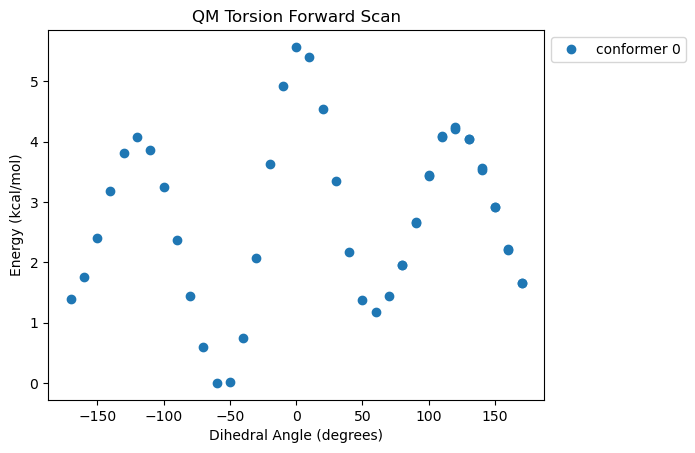

In [13]:
for i in range(len(new_conf_numbers)):
    plt.plot(col_names, combined_df.iloc[i], marker='o', linestyle='None', label='conformer %s' %new_conf_numbers[i])
plt.xlabel('Dihedral Angle (degrees)')
plt.ylabel('Energy (kcal/mol)')
plt.title('QM Torsion Forward Scan')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.tight_layout()

In [14]:
fwd = []

for i in range(len(new_conf_numbers)):
    fwd.append('forward')

In [15]:
combined_df.insert(0, 'Conformer', new_conf_numbers)
combined_df.insert(1,'Scan_Type', fwd)

In [16]:
combined_df.to_csv('profiles_torsions/individual_conformer_scans/fragment%s/torsion%s/torsion%s_seed%s_forward_normalised.csv' % (fragment, dihedral, dihedral, seed_no))